In [1]:
#모듈 로드
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [170]:
# DF
mainDF=pd.read_excel('FAOSTAT_data_en_7-31-2024 (1).xls')

In [171]:
#dF 정보 확인
mainDF.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,1,World,5510,Production,1290.01,Green corn (maize),1993,1993,t,7286220.69,E,Estimated value,NaN
1,QCL,Crops and livestock products,1,World,5510,Production,1290.01,Green corn (maize),1994,1994,t,8658060.06,E,Estimated value,NaN
2,QCL,Crops and livestock products,1,World,5510,Production,1290.01,Green corn (maize),1995,1995,t,8342652.97,E,Estimated value,NaN
3,QCL,Crops and livestock products,1,World,5510,Production,1290.01,Green corn (maize),1996,1996,t,8451116.33,E,Estimated value,NaN
4,QCL,Crops and livestock products,1,World,5510,Production,1290.01,Green corn (maize),1997,1997,t,8622100.43,E,Estimated value,NaN


In [172]:
# 중복데이터 확인
mainDF.duplicated().sum()

0

In [173]:
#필요없는 컬럼 삭제
mainDF.columns


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [174]:
mainDF2=mainDF.drop(['Domain Code','Domain','Element Code','Element','Year Code','Unit','Flag','Flag Description','Note'],axis=1)

In [175]:
#컬럼명 변경
mainDF2.columns=['지역코드','지역','품목코드','품목','연도','생산량(t)']
mainDF2


,지역코드,지역,품목코드,품목,연도,생산량(t)
0,1,World,1290.01,Green corn (maize),1993,7286220.69
1,1,World,1290.01,Green corn (maize),1994,8658060.06
2,1,World,1290.01,Green corn (maize),1995,8342652.97
3,1,World,1290.01,Green corn (maize),1996,8451116.33
4,1,World,1290.01,Green corn (maize),1997,8622100.43
...,...,...,...,...,...,...
2995,9,Oceania,111.00,Wheat,2018,21312165.19
2996,9,Oceania,111.00,Wheat,2019,17995761.79
2997,9,Oceania,111.00,Wheat,2020,14934020.04
2998,9,Oceania,111.00,Wheat,2021,32345470.20


In [176]:
mainDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역코드    3000 non-null   int64  
 1   지역      3000 non-null   object 
 2   품목코드    3000 non-null   float64
 3   품목      3000 non-null   object 
 4   연도      3000 non-null   int64  
 5   생산량(t)  2840 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 140.8+ KB


In [177]:
#결측치 확인
mainDF2.isna().sum()

지역코드        0
지역          0
품목코드        0
품목          0
연도          0
생산량(t)    160
dtype: int64

In [178]:
# 결측치 처리 = >0
mainDF2['생산량(t)'].fillna(0)

0        7286220.69
1        8658060.06
2        8342652.97
3        8451116.33
4        8622100.43
           ...     
2995    21312165.19
2996    17995761.79
2997    14934020.04
2998    32345470.20
2999    36640039.23
Name: 생산량(t), Length: 3000, dtype: float64

In [179]:
#품목 확인하기
mainDF2['품목'].unique()

array(['Green corn (maize)', 'Maize (corn)', 'Potatoes', 'Rice', 'Wheat'],
      dtype=object)

In [180]:
mainDF2['지역'].unique()

array(['World', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Central Asia',
       'Eastern Asia', 'Southern Asia', 'South-eastern Asia',
       'Western Asia', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Oceania'], dtype=object)

In [181]:
corr_result = mainDF2[['지역코드','품목코드','연도','생산량(t)']].corr()
corr_result

,지역코드,품목코드,연도,생산량(t)
지역코드,1.000000e+00,1.269910e-16,5.473229e-14,-0.176489
품목코드,1.269910e-16,1.000000e+00,3.935526e-15,-0.184593
연도,5.473229e-14,3.935526e-15,1.000000e+00,0.059055
생산량(t),-1.764886e-01,-1.845929e-01,5.905462e-02,1.000000


In [182]:
mainDF2['품목'].unique()

array(['Green corn (maize)', 'Maize (corn)', 'Potatoes', 'Rice', 'Wheat'],
      dtype=object)

In [183]:
mainDF2['지역'].unique()

array(['World', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Central Asia',
       'Eastern Asia', 'Southern Asia', 'South-eastern Asia',
       'Western Asia', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Oceania'], dtype=object)

In [184]:
riceDF=mainDF2[mainDF2['품목'].str.contains('Rice', na=False)]
riceDF

,지역코드,지역,품목코드,품목,연도,생산량(t)
90,1,World,113.0,Rice,1993,5.292569e+08
91,1,World,113.0,Rice,1994,5.395327e+08
92,1,World,113.0,Rice,1995,5.475586e+08
93,1,World,113.0,Rice,1996,5.688484e+08
94,1,World,113.0,Rice,1997,5.774395e+08
...,...,...,...,...,...,...
2965,9,Oceania,113.0,Rice,2018,6.459600e+05
2966,9,Oceania,113.0,Rice,2019,7.723190e+04
2967,9,Oceania,113.0,Rice,2020,6.287286e+04
2968,9,Oceania,113.0,Rice,2021,4.371548e+05


In [185]:
#for i in riceDF.index:
    

In [186]:
#   - 밀
wheatDF=mainDF2[mainDF2['품목'].str.contains('Wheat', na=False)]
wheatDF

,지역코드,지역,품목코드,품목,연도,생산량(t)
120,1,World,111.0,Wheat,1993,5.629994e+08
121,1,World,111.0,Wheat,1994,5.329533e+08
122,1,World,111.0,Wheat,1995,5.368145e+08
123,1,World,111.0,Wheat,1996,5.714189e+08
124,1,World,111.0,Wheat,1997,6.191298e+08
...,...,...,...,...,...,...
2995,9,Oceania,111.0,Wheat,2018,2.131217e+07
2996,9,Oceania,111.0,Wheat,2019,1.799576e+07
2997,9,Oceania,111.0,Wheat,2020,1.493402e+07
2998,9,Oceania,111.0,Wheat,2021,3.234547e+07


In [187]:
#   - 감자
PotatoesDF=mainDF2[mainDF2['품목'].str.contains('Potatoes', na=False)]
PotatoesDF

,지역코드,지역,품목코드,품목,연도,생산량(t)
60,1,World,1510.0,Potatoes,1993,3.046104e+08
61,1,World,1510.0,Potatoes,1994,2.701921e+08
62,1,World,1510.0,Potatoes,1995,2.853251e+08
63,1,World,1510.0,Potatoes,1996,3.104873e+08
64,1,World,1510.0,Potatoes,1997,3.010714e+08
...,...,...,...,...,...,...
2935,9,Oceania,1510.0,Potatoes,2018,1.689623e+06
2936,9,Oceania,1510.0,Potatoes,2019,1.751835e+06
2937,9,Oceania,1510.0,Potatoes,2020,1.630810e+06
2938,9,Oceania,1510.0,Potatoes,2021,1.823697e+06


In [188]:
#   - 옥수수
cornDF=mainDF2[mainDF2['품목'].str.contains('Maize', na=False)]
cornDF

,지역코드,지역,품목코드,품목,연도,생산량(t)
30,1,World,112.0,Maize (corn),1993,4.772158e+08
31,1,World,112.0,Maize (corn),1994,5.686548e+08
32,1,World,112.0,Maize (corn),1995,5.172907e+08
33,1,World,112.0,Maize (corn),1996,5.861372e+08
34,1,World,112.0,Maize (corn),1997,5.844012e+08
...,...,...,...,...,...,...
2905,9,Oceania,112.0,Maize (corn),2018,6.042391e+05
2906,9,Oceania,112.0,Maize (corn),2019,5.470022e+05
2907,9,Oceania,112.0,Maize (corn),2020,4.831172e+05
2908,9,Oceania,112.0,Maize (corn),2021,5.374271e+05


In [189]:
cornDF2=mainDF2[mainDF2['품목'].str.contains('Green', na=False)]
cornDF2

,지역코드,지역,품목코드,품목,연도,생산량(t)
0,1,World,1290.01,Green corn (maize),1993,7286220.69
1,1,World,1290.01,Green corn (maize),1994,8658060.06
2,1,World,1290.01,Green corn (maize),1995,8342652.97
3,1,World,1290.01,Green corn (maize),1996,8451116.33
4,1,World,1290.01,Green corn (maize),1997,8622100.43
...,...,...,...,...,...,...
2875,9,Oceania,1290.01,Green corn (maize),2018,364938.69
2876,9,Oceania,1290.01,Green corn (maize),2019,393912.57
2877,9,Oceania,1290.01,Green corn (maize),2020,341686.22
2878,9,Oceania,1290.01,Green corn (maize),2021,384098.33


In [190]:
cornDF['합계']=0
cornDF

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_10592\3101283183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cornDF['합계']=0


,지역코드,지역,품목코드,품목,연도,생산량(t),합계
30,1,World,112.0,Maize (corn),1993,4.772158e+08,0
31,1,World,112.0,Maize (corn),1994,5.686548e+08,0
32,1,World,112.0,Maize (corn),1995,5.172907e+08,0
33,1,World,112.0,Maize (corn),1996,5.861372e+08,0
34,1,World,112.0,Maize (corn),1997,5.844012e+08,0
...,...,...,...,...,...,...,...
2905,9,Oceania,112.0,Maize (corn),2018,6.042391e+05,0
2906,9,Oceania,112.0,Maize (corn),2019,5.470022e+05,0
2907,9,Oceania,112.0,Maize (corn),2020,4.831172e+05,0
2908,9,Oceania,112.0,Maize (corn),2021,5.374271e+05,0


In [191]:
cornDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 30 to 2909
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역코드    600 non-null    int64  
 1   지역      600 non-null    object 
 2   품목코드    600 non-null    float64
 3   품목      600 non-null    object 
 4   연도      600 non-null    int64  
 5   생산량(t)  600 non-null    float64
 6   합계      600 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 37.5+ KB


In [192]:
cornDF['합계']=(cornDF['생산량(t)']+cornDF2['생산량(t)']).astype('float')
cornDF

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_10592\801060968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cornDF['합계']=(cornDF['생산량(t)']+cornDF2['생산량(t)']).astype('float')


,지역코드,지역,품목코드,품목,연도,생산량(t),합계
30,1,World,112.0,Maize (corn),1993,4.772158e+08,NaN
31,1,World,112.0,Maize (corn),1994,5.686548e+08,NaN
32,1,World,112.0,Maize (corn),1995,5.172907e+08,NaN
33,1,World,112.0,Maize (corn),1996,5.861372e+08,NaN
34,1,World,112.0,Maize (corn),1997,5.844012e+08,NaN
...,...,...,...,...,...,...,...
2905,9,Oceania,112.0,Maize (corn),2018,6.042391e+05,NaN
2906,9,Oceania,112.0,Maize (corn),2019,5.470022e+05,NaN
2907,9,Oceania,112.0,Maize (corn),2020,4.831172e+05,NaN
2908,9,Oceania,112.0,Maize (corn),2021,5.374271e+05,NaN


In [193]:
# 선그래프 만들기
def drawLineGraph(title,DF):
    colors=['#000000',"#d00412", "#ec061d", "#e7a9b0", "#e3646f", "#94080d",
            "#b4e639", "#8abf2c", "#2f6b1a", "#143f17",
            "#0487e2", "#0463ca", "#b0d6f5", "#65c2f5", "#09b1ec",
            "#6a398c", "#804595", "#9c539c", "#c967a2", '#f9d83f']
    area=DF['지역'].unique()
    plt.figure(figsize=(16, 7))

    for idx, a in enumerate(area):
        plt.plot(DF[DF['지역']==a]['연도'],DF[DF['지역']==a]['생산량(t)'],label=a,color=colors[idx])
    
    plt.title(f'[{title}]')
    plt.xlabel('연도') 
    plt.ylabel('생산량(t)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('img/' + title + '.png',dpi=100)
    plt.show()
    plt.close()



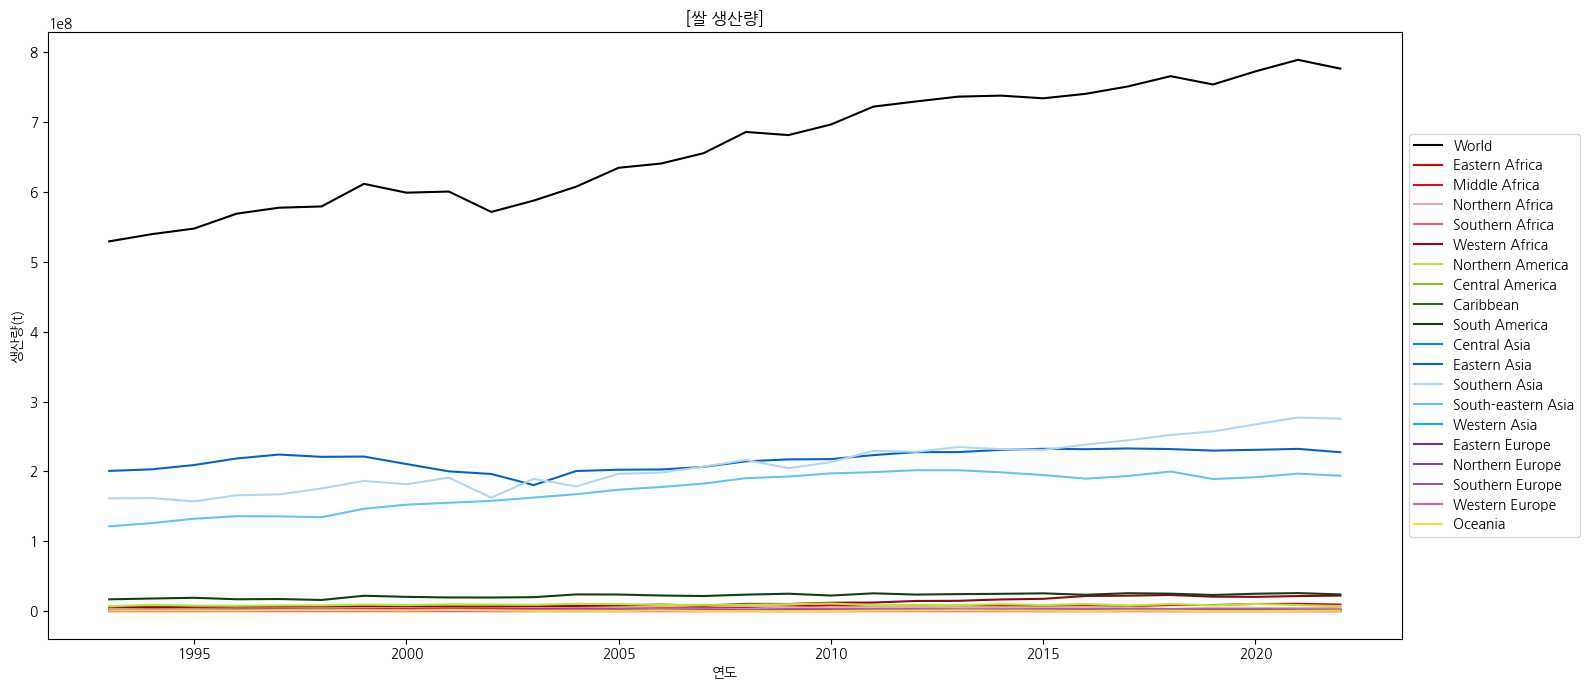

In [194]:
drawLineGraph('쌀 생산량',riceDF)

In [195]:
def drawLineGraph_asia(title,DF,year1,year2):
	colors=[ "#bdc7d7", "#5087f7", "#120b8f", "#8bcff1", "#b1dfe6"]
	area=DF['지역'].unique()[10:15]
	plt.figure(figsize=(8, 7))

	for idx, a in enumerate(area):
		plt.plot(DF[(DF['지역']==a)&(DF['연도']>=year1)&(DF['연도']<=year2)]['연도'],
					DF[(DF['지역']==a)&(DF['연도']>=year1)&(DF['연도']<=year2)]['생산량(t)'],label=a,color=colors[idx])

	plt.title(f'[{year1}년 ~ {year2}년 {title}]')
	plt.xlabel('연도') 
	plt.ylabel('생산량(t)')
	plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
	plt.tight_layout()
	plt.savefig('img/' + f'{year1}-{year2} {title}' + '.png',dpi=100)
	plt.show()
	plt.close()

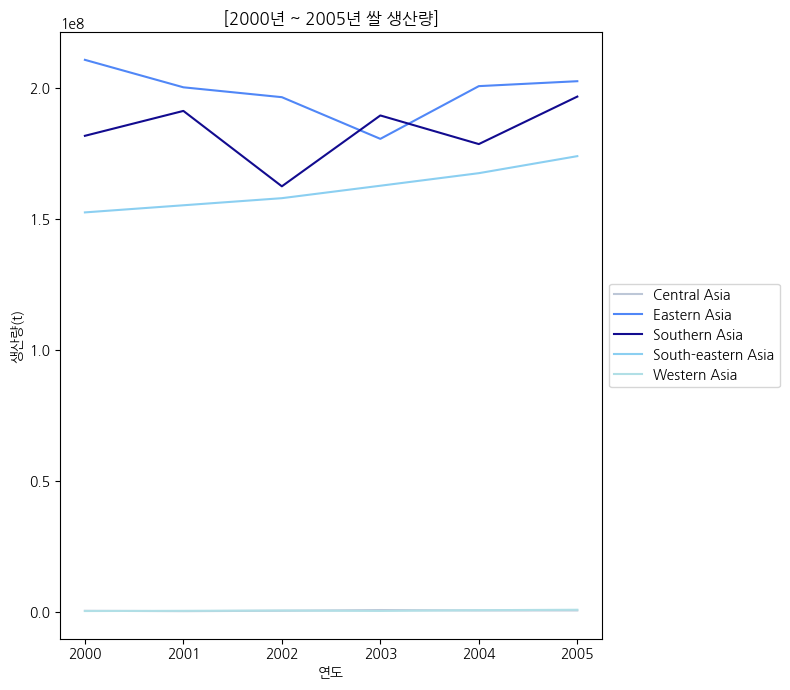

In [196]:
drawLineGraph_asia('쌀 생산량',riceDF,2000,2005)

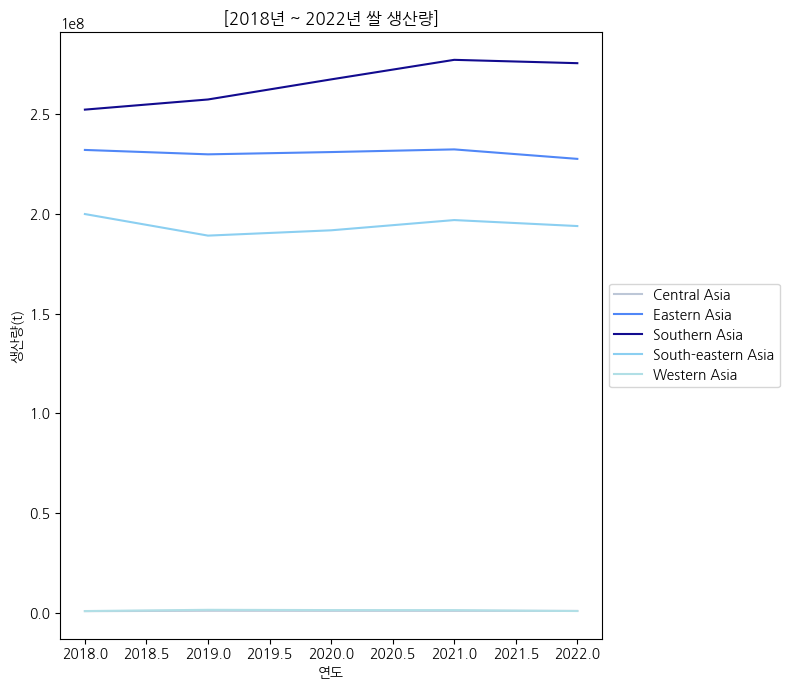

In [197]:
drawLineGraph_asia('쌀 생산량',riceDF,2018,2022)

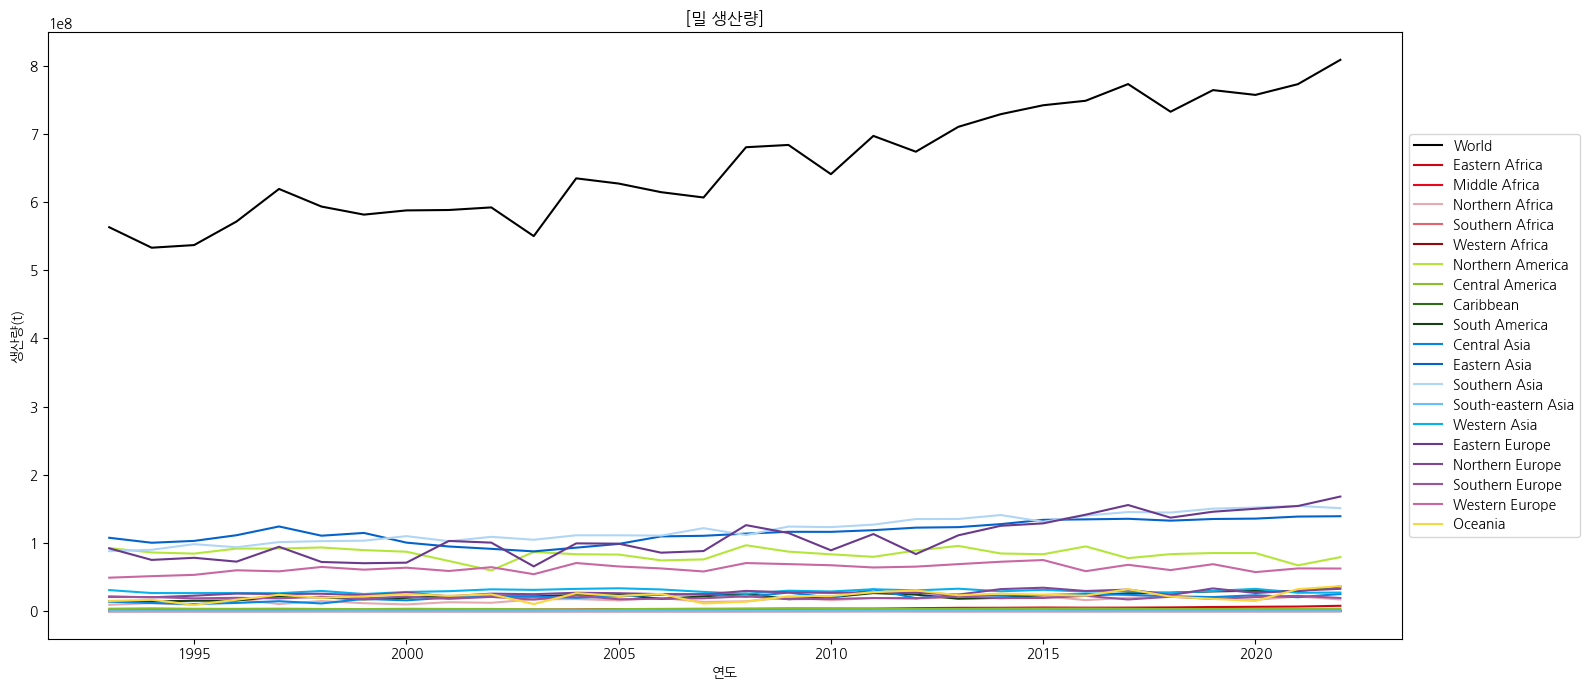

In [198]:
drawLineGraph('밀 생산량',wheatDF)

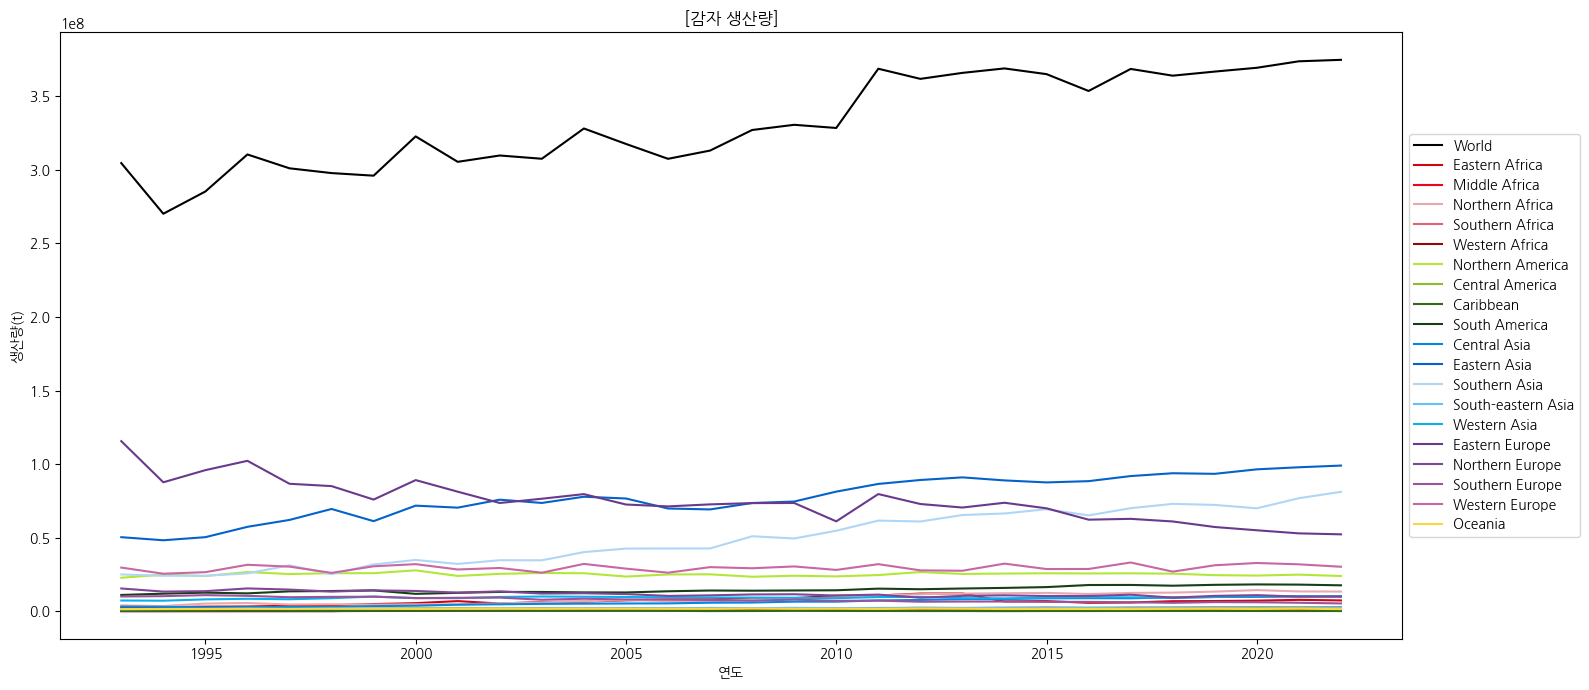

In [199]:
drawLineGraph('감자 생산량',PotatoesDF)

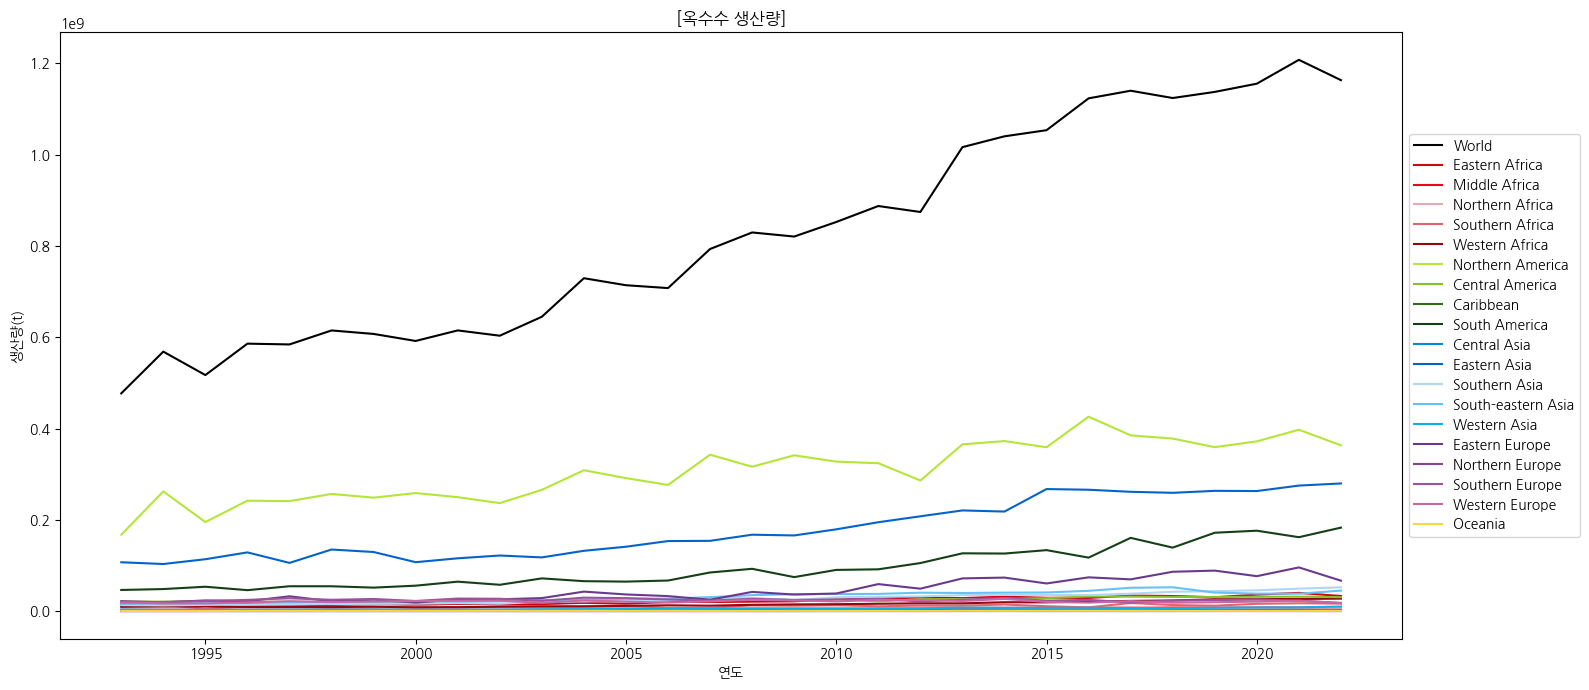

In [200]:
drawLineGraph('옥수수 생산량',cornDF)

In [201]:
easternEurope_df=pd.read_csv('FAOSTAT_data_en_8-1-2024.csv')

In [202]:
easternEurope_df.duplicated().sum()

0

In [203]:
easternEurope_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [204]:
easternEurope_df2=easternEurope_df.drop(['Domain Code','Domain','Element Code','Element','Year Code','Unit','Flag','Flag Description','Note'],axis=1)

In [205]:
easternEurope_df2.columns=['지역코드','지역','품목코드','품목','연도','생산량(t)']
easternEurope_df2


,지역코드,지역,품목코드,품목,연도,생산량(t)
0,112,Belarus,111,Wheat,1993,354100.0
1,112,Belarus,111,Wheat,1994,230300.0
2,112,Belarus,111,Wheat,1995,438800.0
3,112,Belarus,111,Wheat,1996,600300.0
4,112,Belarus,111,Wheat,1997,743900.0
...,...,...,...,...,...,...
325,151,Eastern Europe,111,Wheat,2018,137106542.0
326,151,Eastern Europe,111,Wheat,2019,145832344.0
327,151,Eastern Europe,111,Wheat,2020,150139391.7
328,151,Eastern Europe,111,Wheat,2021,154174048.4


In [206]:
easternEurope_df2['연도'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

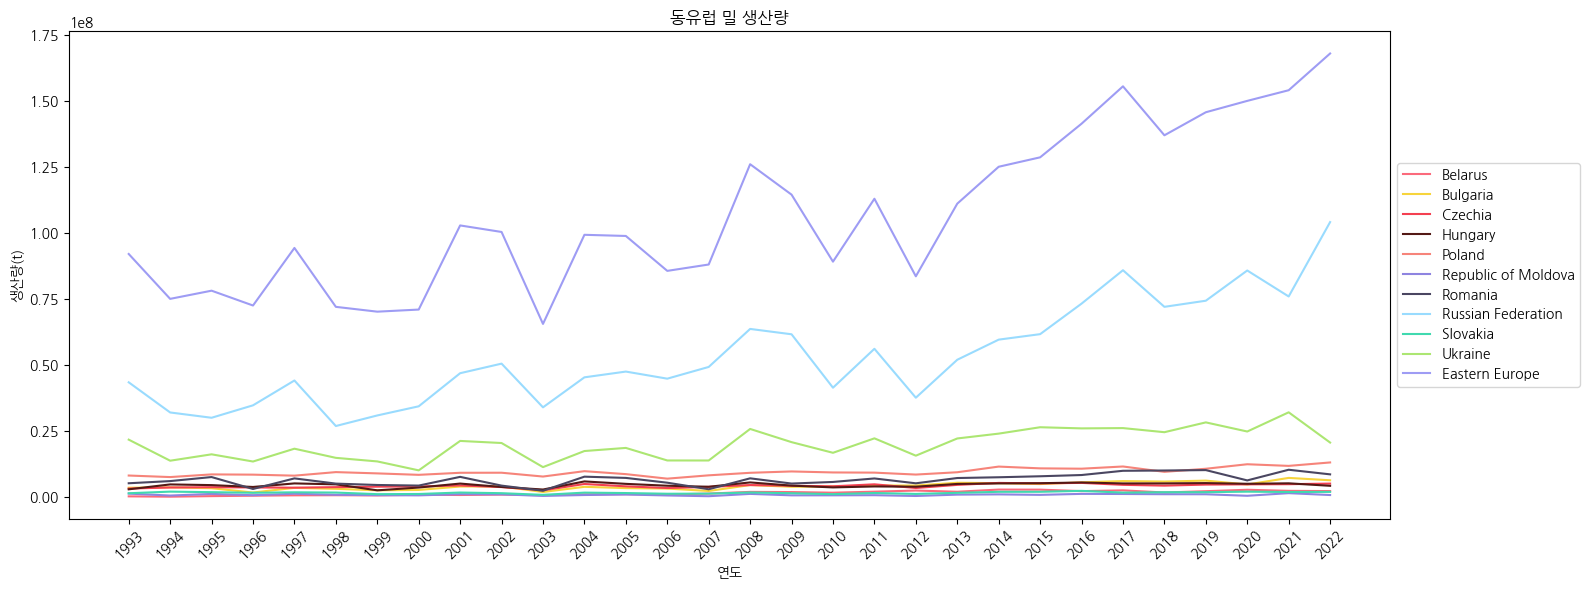

In [207]:
colors=["#fb6a7c", "#f7d43c", "#f44051", "#531915", "#f6847a","#8e84e0", "#4a4661", "#99dbfe", "#40d9af", "#ace672",'#9e9cf4']
area=easternEurope_df2['지역'].unique()
plt.figure(figsize=(16, 6))

for idx, a in enumerate(area):
	plt.plot(easternEurope_df2[easternEurope_df2['지역']==a]['연도'],
		  easternEurope_df2[easternEurope_df2['지역']==a]['생산량(t)'],
		  label=a,color=colors[idx])

plt.title('동유럽 밀 생산량')
plt.xlabel('연도') 
plt.ylabel('생산량(t)')
plt.xticks(range(1993,2023),[1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('img/' + '동유럽 밀 생산량' + '.png',dpi=100)
plt.show()
plt.close()

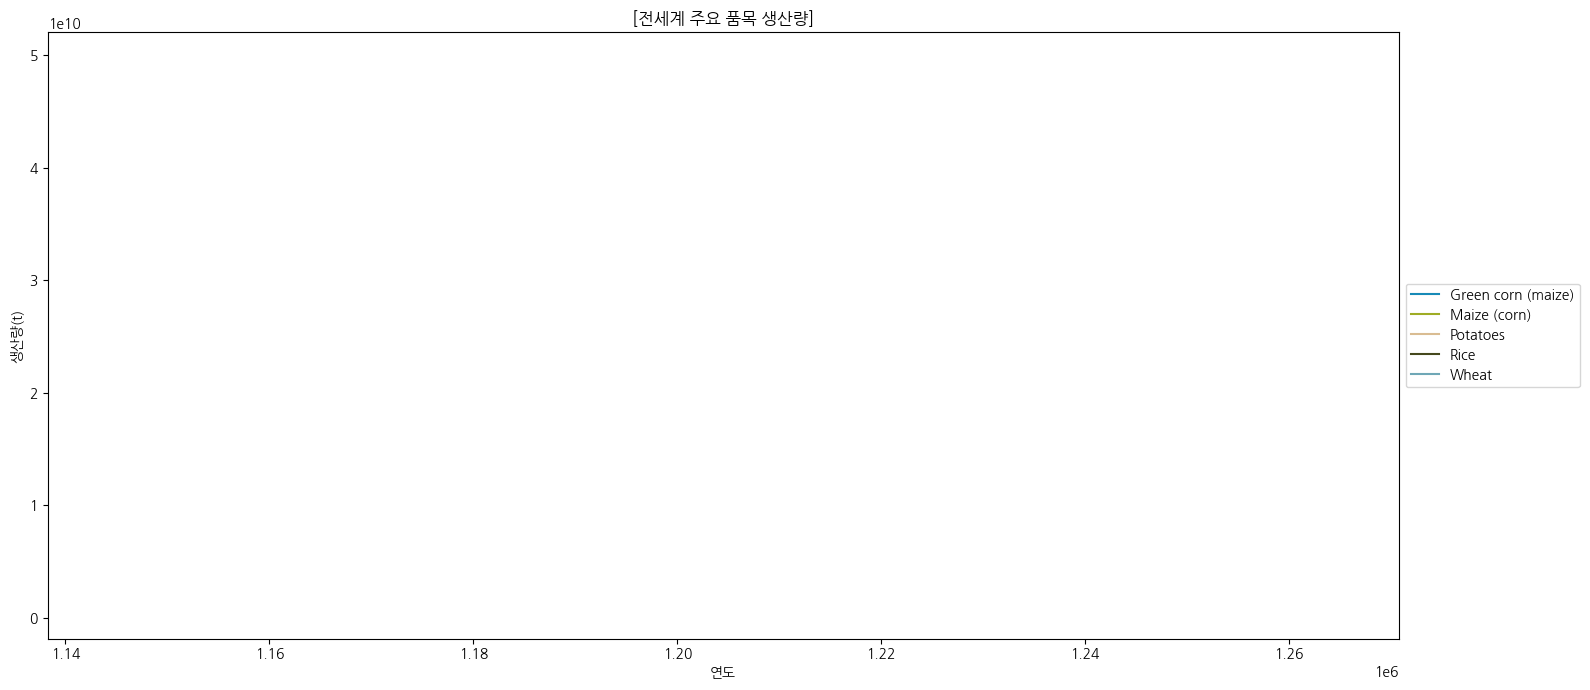

In [208]:
colors=["#178ab7", "#9fac24", "#d9bc92", "#45481d", "#6fa7b6"]
food=mainDF2['품목'].unique()
plt.figure(figsize=(16, 7))

for idx, a in enumerate(food):
	plt.plot(mainDF2[mainDF2['품목']==a]['연도'].sum(),mainDF2[mainDF2['품목']==a]['생산량(t)'].sum(),label=a,color=colors[idx])

plt.title(f'[전세계 주요 품목 생산량]')
plt.xlabel('연도') 
plt.ylabel('생산량(t)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('img/' + '전세계 주요 품목 생산량' + '.png',dpi=100)
plt.show()
plt.close()

In [209]:
worldDF=pd.read_excel('FAOSTAT_data_en_8-1-2024.xls')
worldDF.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,1,World,5510,Production,112,Maize (corn),1993,1993,t,4.772158e+08,A,Official figure,NaN
1,QCL,Crops and livestock products,1,World,5510,Production,112,Maize (corn),1994,1994,t,5.686548e+08,A,Official figure,NaN
2,QCL,Crops and livestock products,1,World,5510,Production,112,Maize (corn),1995,1995,t,5.172907e+08,A,Official figure,NaN
3,QCL,Crops and livestock products,1,World,5510,Production,112,Maize (corn),1996,1996,t,5.861372e+08,A,Official figure,NaN
4,QCL,Crops and livestock products,1,World,5510,Production,112,Maize (corn),1997,1997,t,5.844012e+08,A,Official figure,NaN


In [210]:
worldDF.duplicated().sum()

0

In [211]:
worldDF2=worldDF.drop(['Domain Code','Domain','Element Code','Element','Year Code','Unit','Flag','Flag Description','Note'],axis=1)
#컬럼명 변경
worldDF2.columns=['지역코드','지역','품목코드','품목','연도','생산량(t)']
worldDF2


,지역코드,지역,품목코드,품목,연도,생산량(t)
0,1,World,112,Maize (corn),1993,4.772158e+08
1,1,World,112,Maize (corn),1994,5.686548e+08
2,1,World,112,Maize (corn),1995,5.172907e+08
3,1,World,112,Maize (corn),1996,5.861372e+08
4,1,World,112,Maize (corn),1997,5.844012e+08
...,...,...,...,...,...,...
115,1,World,111,Wheat,2018,7.323570e+08
116,1,World,111,Wheat,2019,7.640534e+08
117,1,World,111,Wheat,2020,7.570231e+08
118,1,World,111,Wheat,2021,7.727794e+08


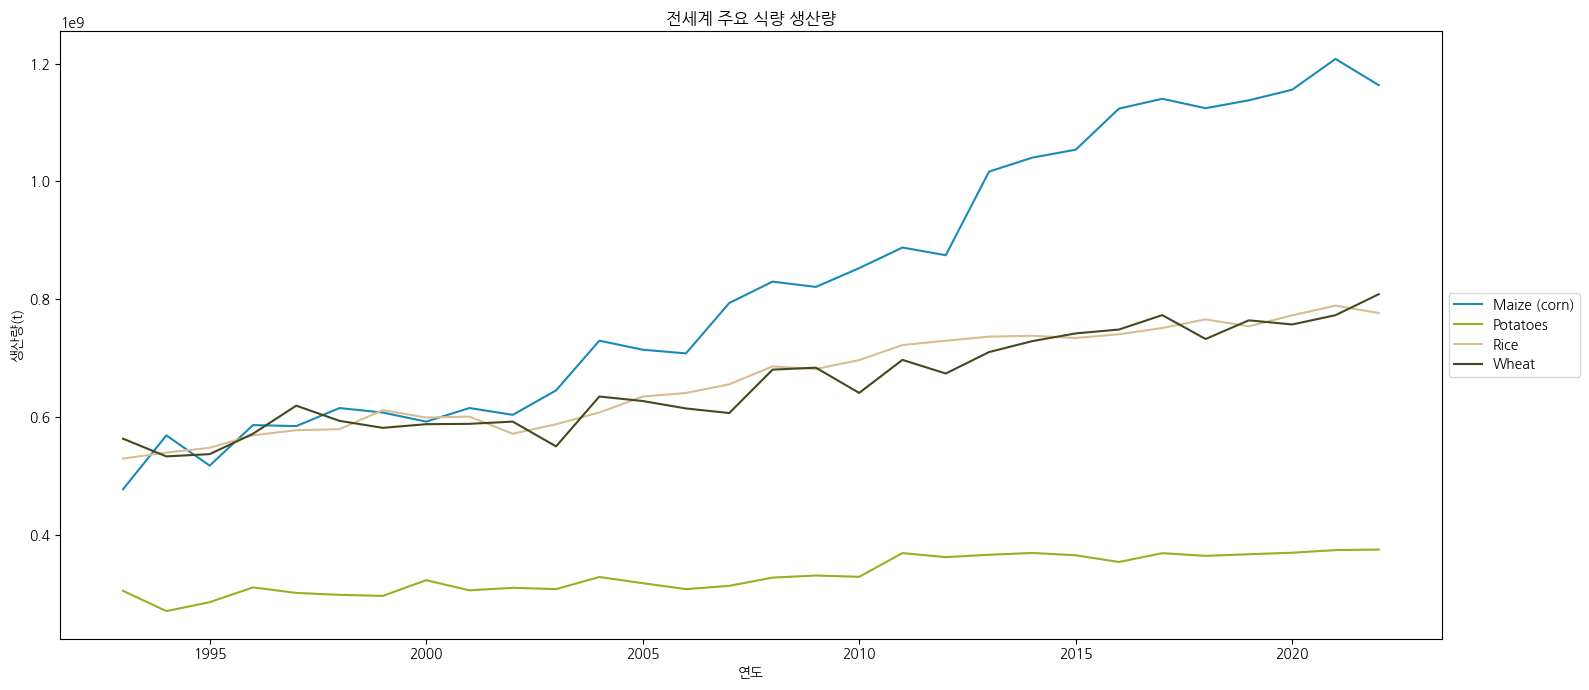

In [212]:
colors=["#178ab7", "#9fac24", "#d9bc92", "#45481d", "#6fa7b6"]
area=worldDF2['품목'].unique()
plt.figure(figsize=(16, 7))

for idx, a in enumerate(area):
	plt.plot(worldDF2[worldDF2['품목']==a]['연도'],worldDF2[worldDF2['품목']==a]['생산량(t)'],label=a,color=colors[idx])

plt.title('전세계 주요 식량 생산량')
plt.xlabel('연도') 
plt.ylabel('생산량(t)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('img/' + '전세계 주요 식량 생산량' + '.png',dpi=100)
plt.show()
plt.close()
